# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides.columns = ["", "Total Rides"]
total_rides.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

Text(0.5, 1.0, 'Total Rides by Area')

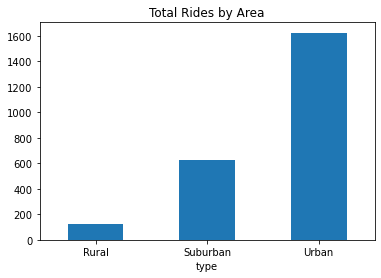

In [6]:
total_ridesb = total_rides.plot(kind='bar', rot=0)
plt.title('Total Rides by Area')

In [7]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).max()['driver_count']
total_drivers.columns = ["", "Total Drivers"]
total_drivers

type
Rural        9
Suburban    25
Urban       73
Name: driver_count, dtype: int64

Text(0.5, 1.0, 'Total Drivers by Area')

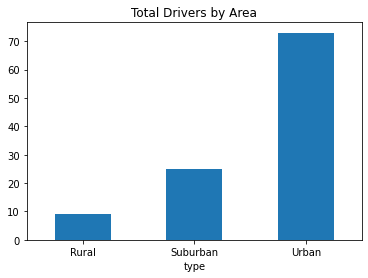

In [8]:
total_driversb = total_drivers.plot(kind='bar', rot = 0)
plt.title('Total Drivers by Area')

In [9]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares.columns = ["", "Total Fares"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 
average_fare = pyber_data_df.groupby(['type']).mean()['fare']
average_fare.columns = ["", "Average Fare per Ride"]
average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

Text(0.5, 1.0, 'Average Fare by Area')

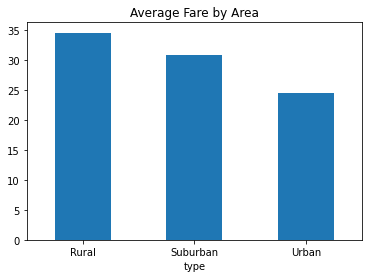

In [11]:
average_fareb = average_fare.plot(kind='bar', rot=0)
plt.title('Average Fare by Area')

In [12]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = (average_fare / total_drivers)#, name = 'Average Fare per Driver'
average_driver_fare.columns = ["", "Average Fare per Driver"]
average_driver_fare

type
Rural       3.847049
Suburban    1.238805
Urban       0.335969
dtype: float64

Text(0.5, 1.0, 'Average Fare per Driver')

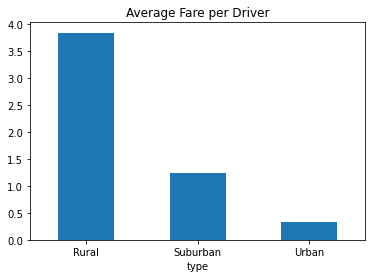

In [13]:
average_driver_fareb = average_driver_fare.plot(kind='bar',rot=0)
plt.title('Average Fare per Driver')

In [14]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
     {'Total Rides': total_rides,
      'Total Drivers': total_drivers,
      'Total Fares': total_fares,
      'Average Fare': average_fare,
      'Average Fare/Driver': average_driver_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare/Driver
type,,,,,
Rural,125,9,4327.93,34.623440,3.847049
Suburban,625,25,19356.33,30.970128,1.238805
Urban,1625,73,39854.38,24.525772,0.335969


In [15]:
# https://www.kite.com/python/answers/how-to-merge-two-pandas-series-into-a-dataframe-in-python
#pyber_summary_df = pd.concat([total_rides, total_drivers, total_fares, average_fare, average_driver_fare], axis=1)

In [16]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [17]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare/Driver
Rural,125,9,4327.93,34.623440,3.847049
Suburban,625,25,19356.33,30.970128,1.238805
Urban,1625,73,39854.38,24.525772,0.335969


In [18]:
#  8. Format the columns.
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare'] = pyber_summary_df['Average Fare'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare/Driver'] = pyber_summary_df['Average Fare/Driver'].map('${:,.2f}'.format)

pyber_summary_df

# per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
# per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare/Driver
Rural,125,9,"$4,327.93",$34.62,$3.85
Suburban,625,25,"$19,356.33",$30.97,$1.24
Urban,1625,73,"$39,854.38",$24.53,$0.34


In [19]:
pyber_summary_df.columns

Index(['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare',
       'Average Fare/Driver'],
      dtype='object')

In [20]:
pyber_summary_df.rename(columns={'Total Rides':'Total Rides', 'Total Drivers':'Total Drivers', 'Total FAres': 'Average Fare per Ride',
       'Average Fare per Ride':'Average Fare per Ride', 'Average Fare per Driver':'Average Fare per Driver'})

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare/Driver
Rural,125,9,"$4,327.93",$34.62,$3.85
Suburban,625,25,"$19,356.33",$30.97,$1.24
Urban,1625,73,"$39,854.38",$24.53,$0.34


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# key was adding .sum() I wasn't getting a data frame before
fare_sum_df = pyber_data_df.groupby(['type','date']).sum()
fare_sum_df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [23]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum_df = fare_sum_df.reset_index()

In [24]:
fare_sum_df

,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [25]:
fare_sum_df['date']

0       2019-01-01 09:45:36
1       2019-01-02 11:18:32
2       2019-01-03 19:51:01
3       2019-01-04 03:31:26
4       2019-01-06 07:38:40
               ...         
2370    2019-05-08 04:20:00
2371    2019-05-08 04:39:49
2372    2019-05-08 07:29:01
2373    2019-05-08 11:38:35
2374    2019-05-08 13:10:18
Name: date, Length: 2375, dtype: object

In [26]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_date = fare_sum_df.pivot(index='date', columns='type',values='fare')
fare_sum_date.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [27]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Jan_Apr_trips = fare_sum_date.loc['2019-01-01' : '2019-04-29']
Jan_Apr_trips


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [28]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# trouble with ID of index, did not recognize 'date' or '[0]'
Jan_Apr_trips.index = pd.to_datetime(Jan_Apr_trips.index)

In [29]:
# 7. Check that the datatype for the index is datetime using df.info()
# See DatetimeIndex:  got it!
Jan_Apr_trips.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [30]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_trips = Jan_Apr_trips.resample('W').sum()
weekly_trips.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


Text(0.5, 1.0, 'Weekly Rides, January - April 2015')

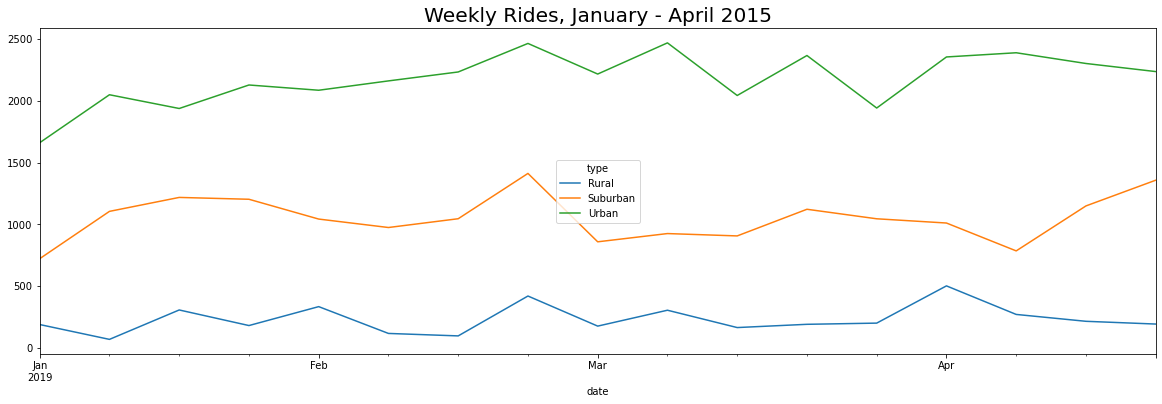

In [31]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_data = weekly_trips.plot(figsize = (20,6))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_data.set_title('Weekly Rides, January - April 2015')

